# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Fall 2019

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [2]:
%matplotlib notebook

In [3]:
im1_file = './kiwi2.jpg'
im2_file = './nikhil.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


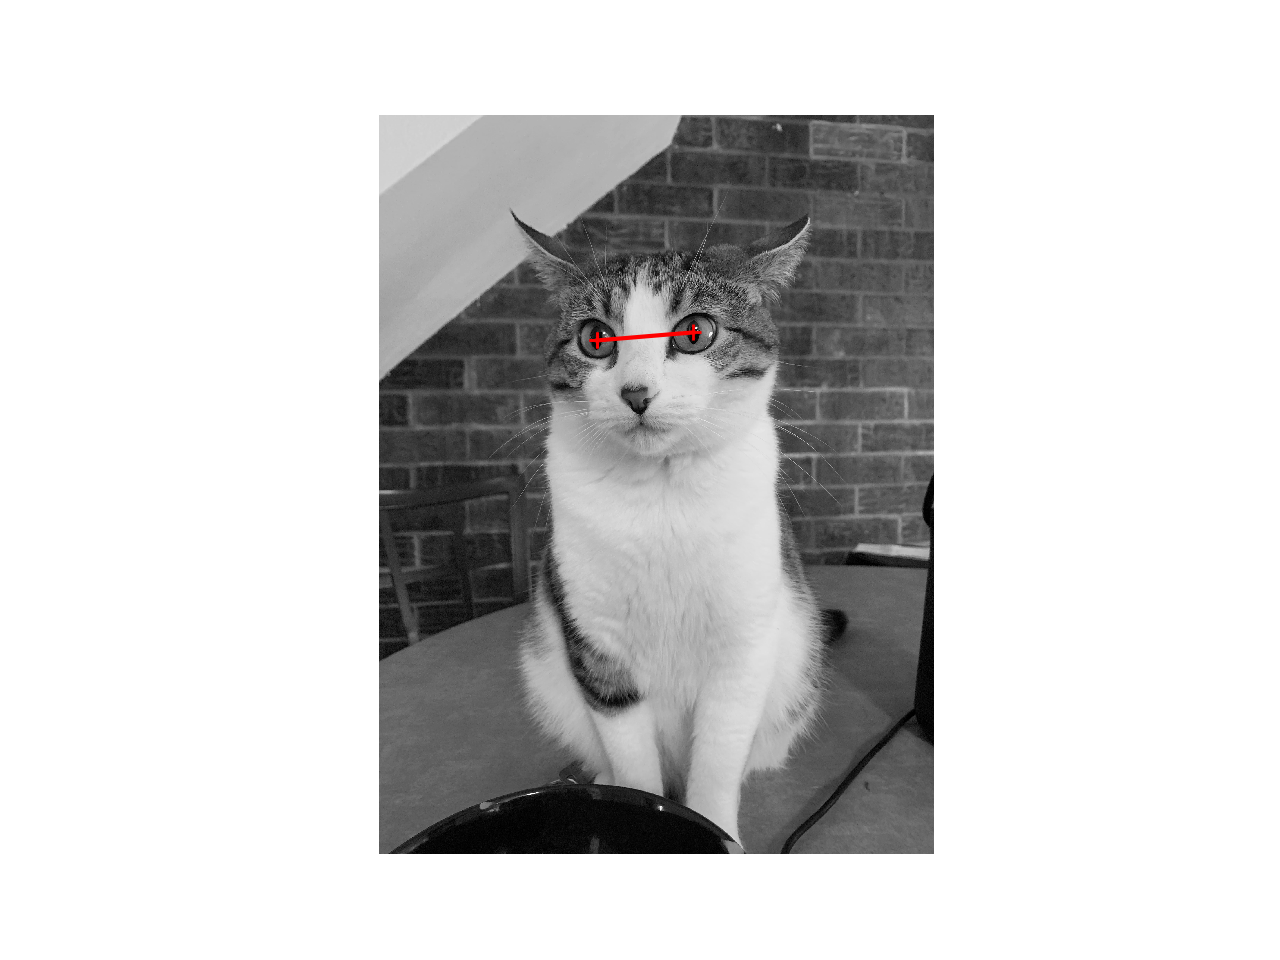

In [4]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


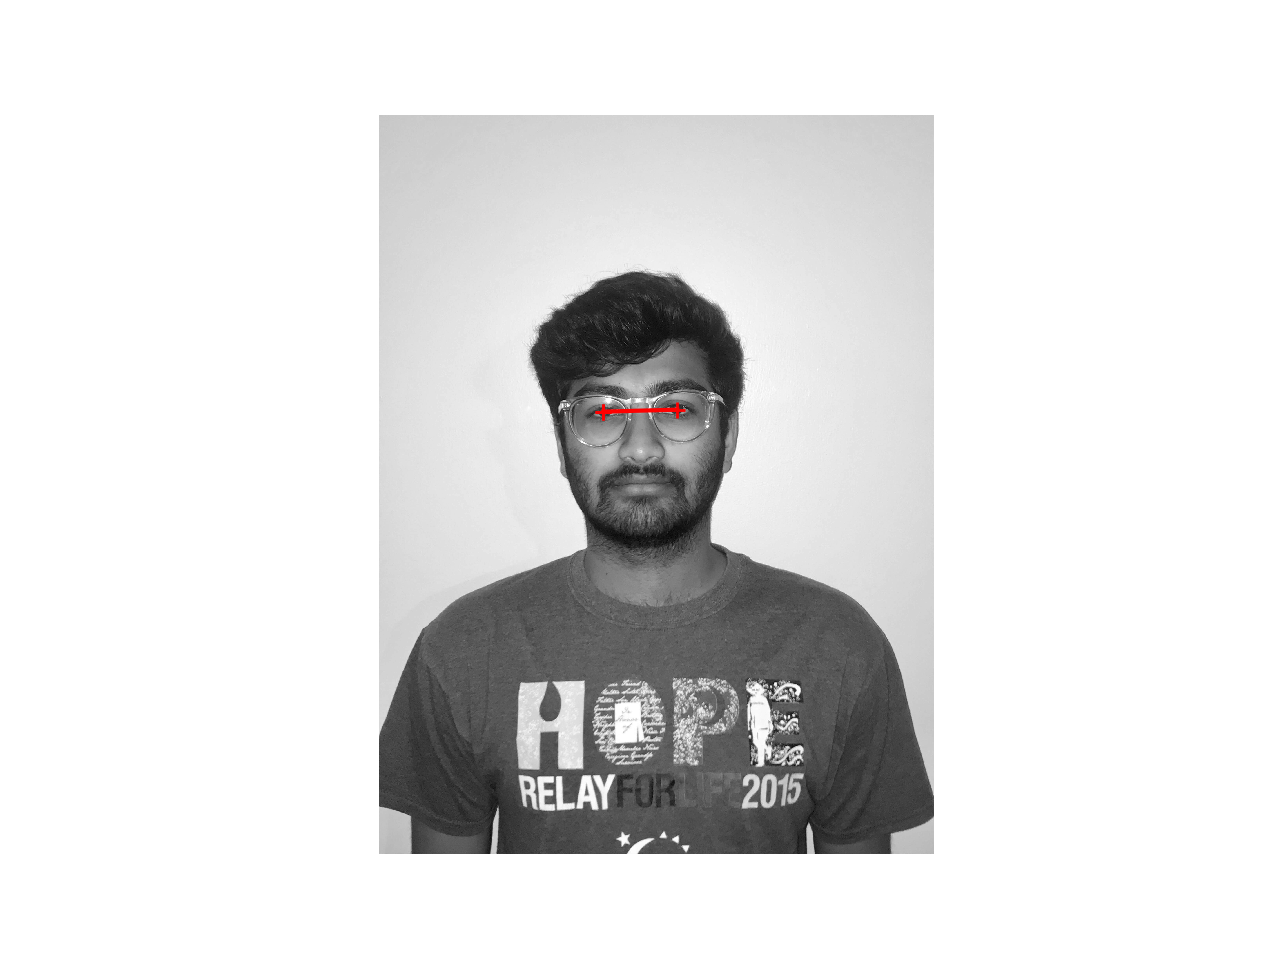

In [5]:
pts_im2 = utils.prompt_eye_selection(im2)

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


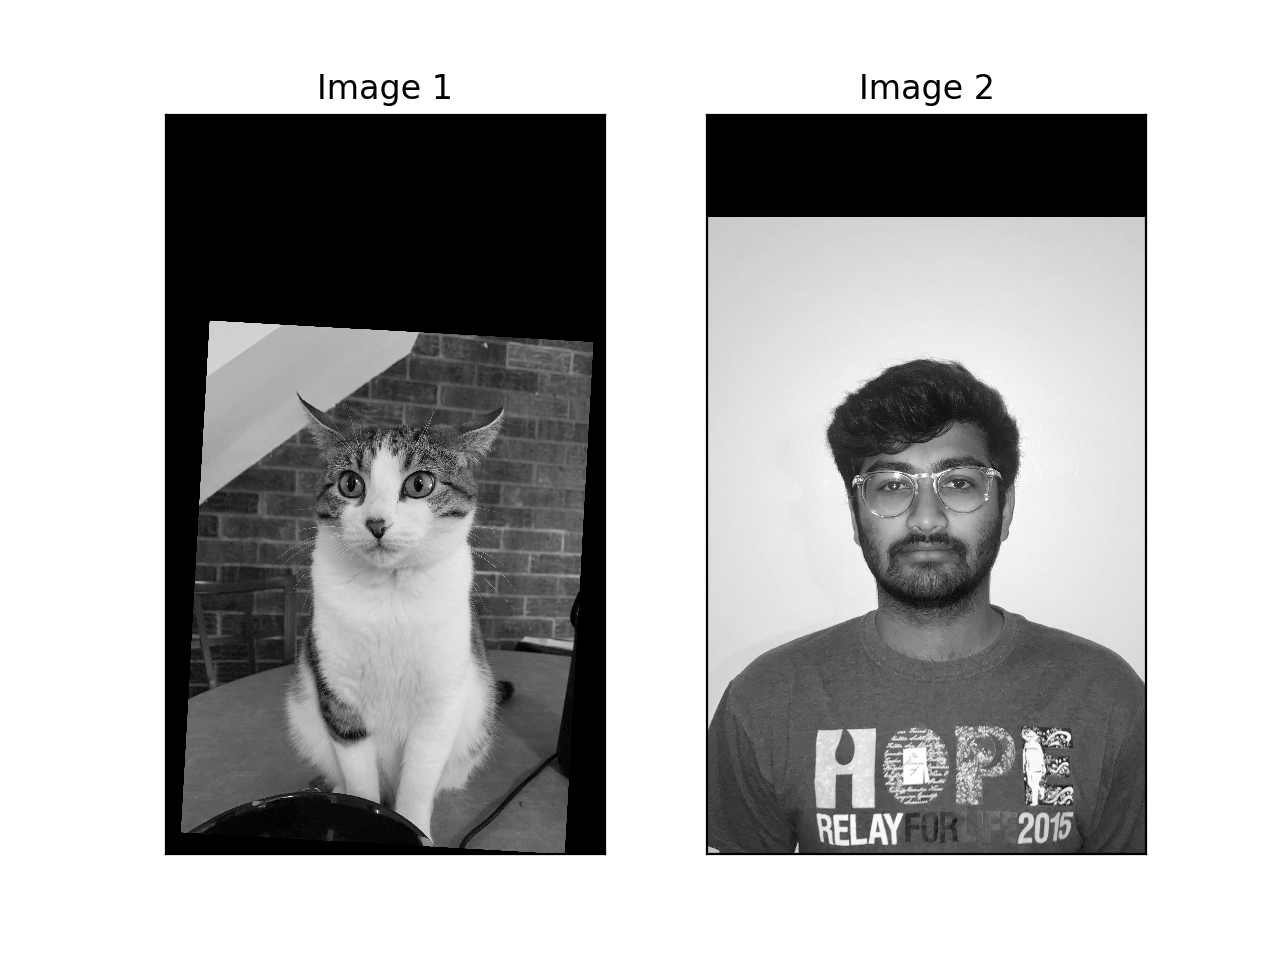

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [9]:
def hybridImage(im2, im1, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''    
#     im1_filt = sc.ndimage.gaussian_filter(im1, sigma=cutoff_low)
    kernel1 = utils.gaussian_kernel(cutoff_low, int(3*cutoff_low))
    im1_filt = signal.convolve2d(im1,kernel1,boundary='symm', mode='same')
    
    plt.figure()
    plt.imshow(im1,cmap='gray')
#     plt.figure()
#     plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
#     plt.figure()
#     plt.imshow(im1_filt,cmap='gray')
#     plt.figure()
#     plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_filt)))))
    
#     im2_filt = im2-sc.ndimage.gaussian_filter(im2, sigma=cutoff_high)
    kernel2 = utils.gaussian_kernel(cutoff_high, int(3*cutoff_high))
    im2_filt = im2-signal.convolve2d(im2,kernel2,boundary='symm', mode='same')
    
    plt.figure()
    plt.imshow(im2,cmap='gray')
#     plt.figure()
#     plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
#     plt.figure()
#     plt.imshow(im2_filt,cmap='gray')
#     plt.figure()
#     plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_filt)))))
    
    hybrid = im1_filt+im2_filt
    
    plt.figure()
    plt.imshow(hybrid,cmap='gray')
#     plt.figure()
#     plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid)))))
    
    return hybrid


<IPython.core.display.Javascript object>


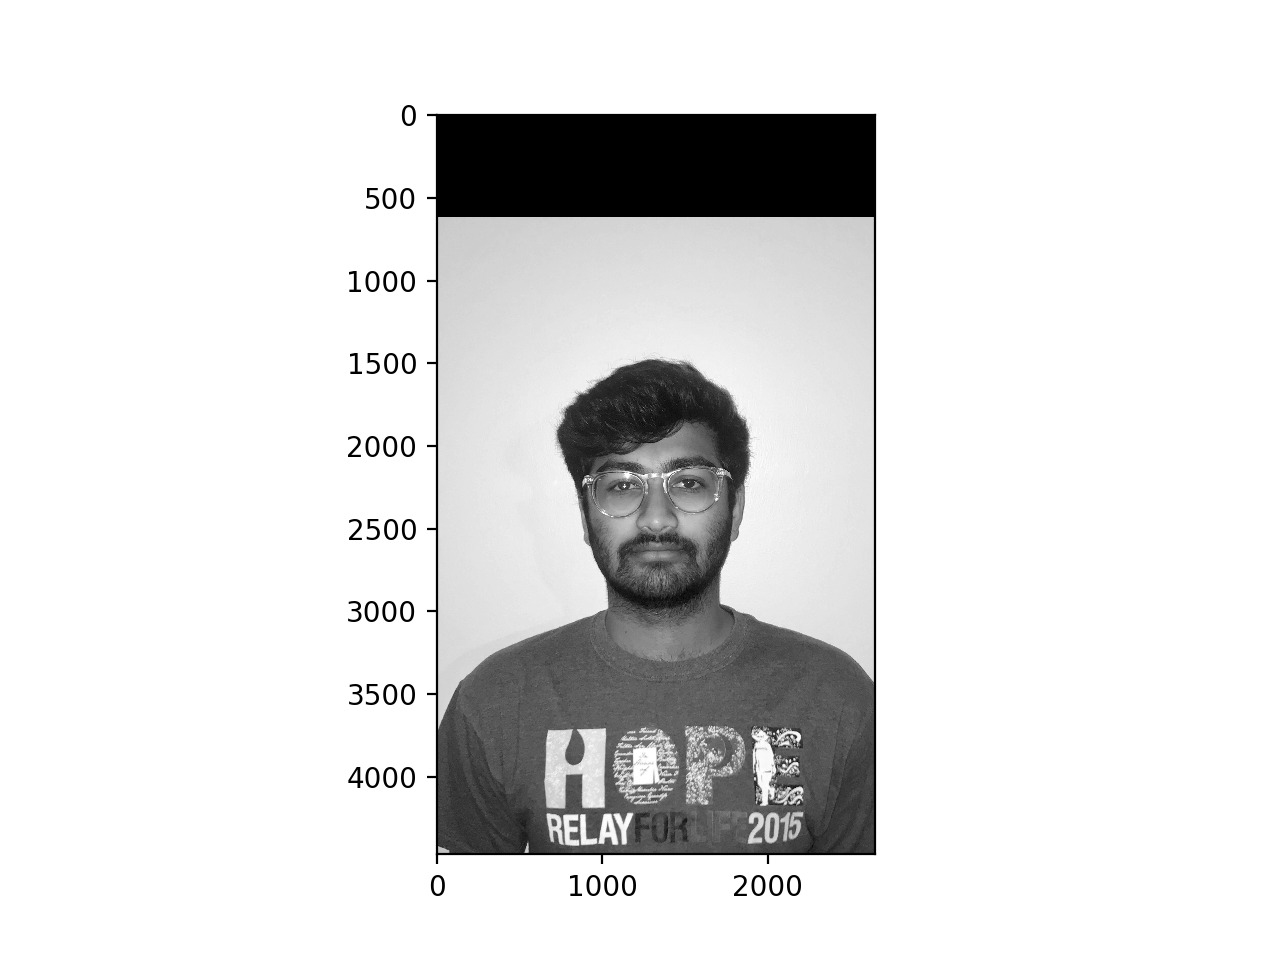

<IPython.core.display.Javascript object>


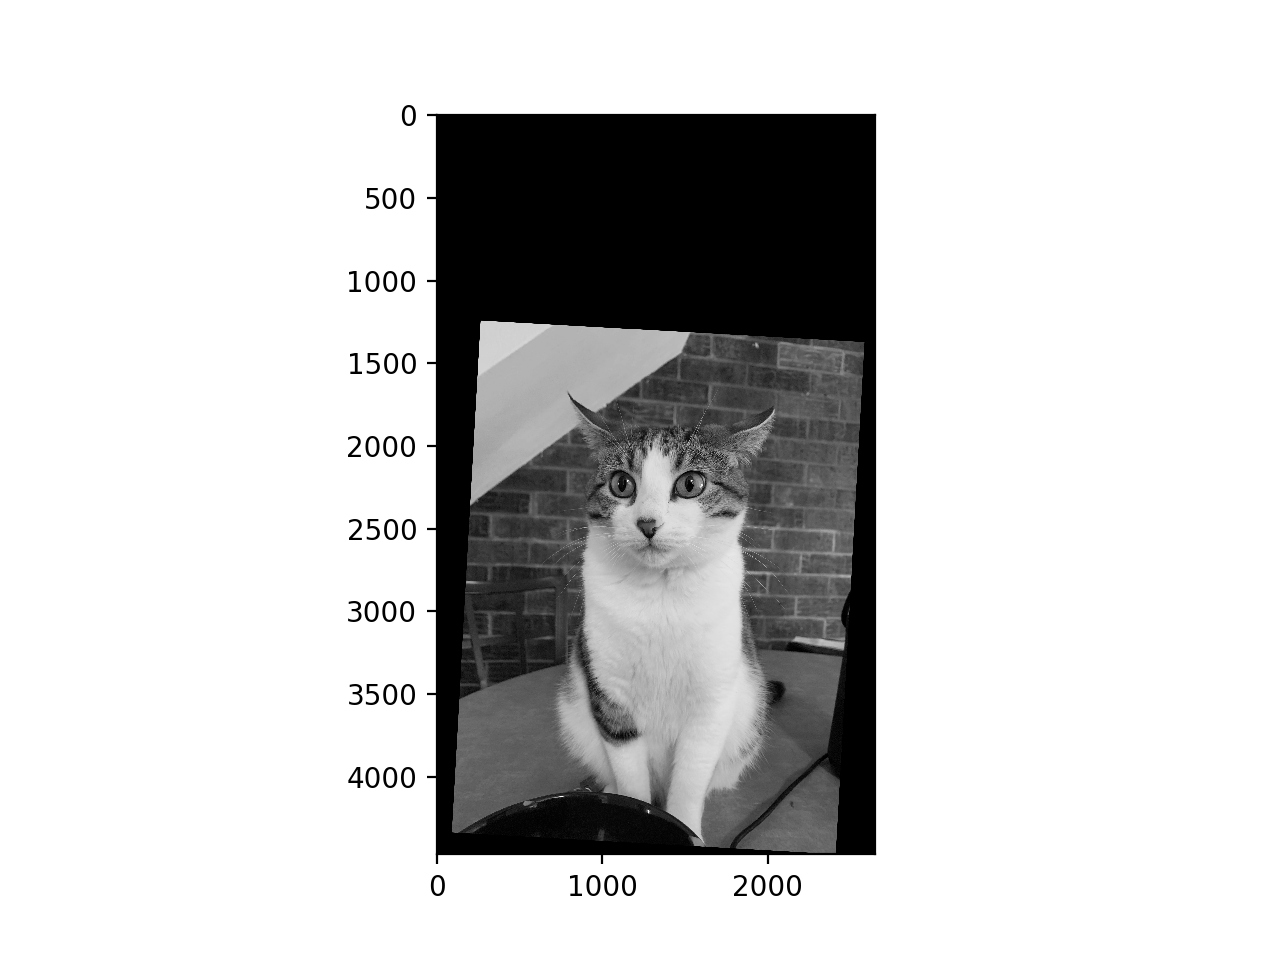

<IPython.core.display.Javascript object>


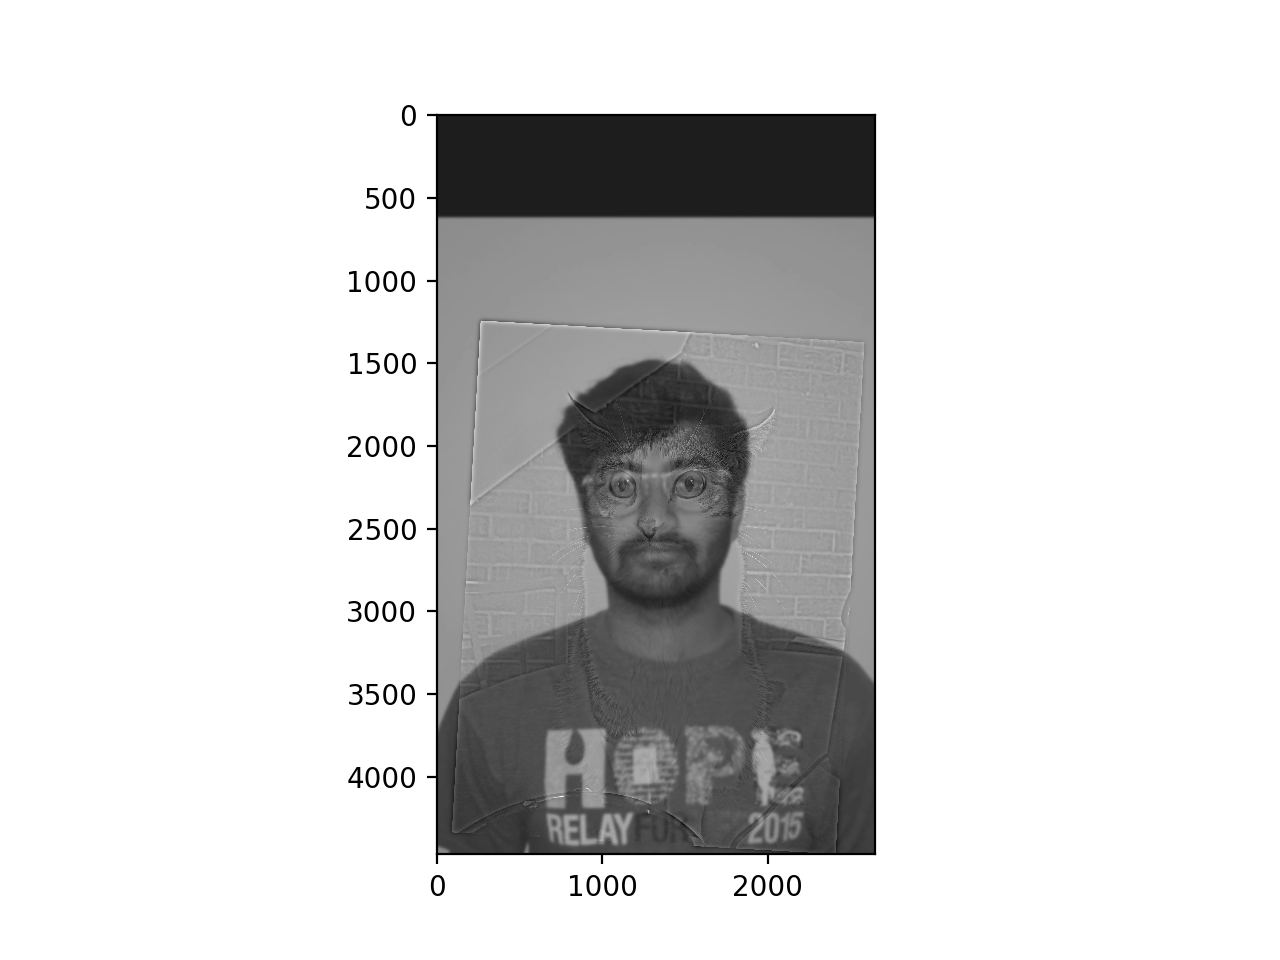

In [10]:
arbitrary_value = 5  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = 8
cutoff_high = 14

im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


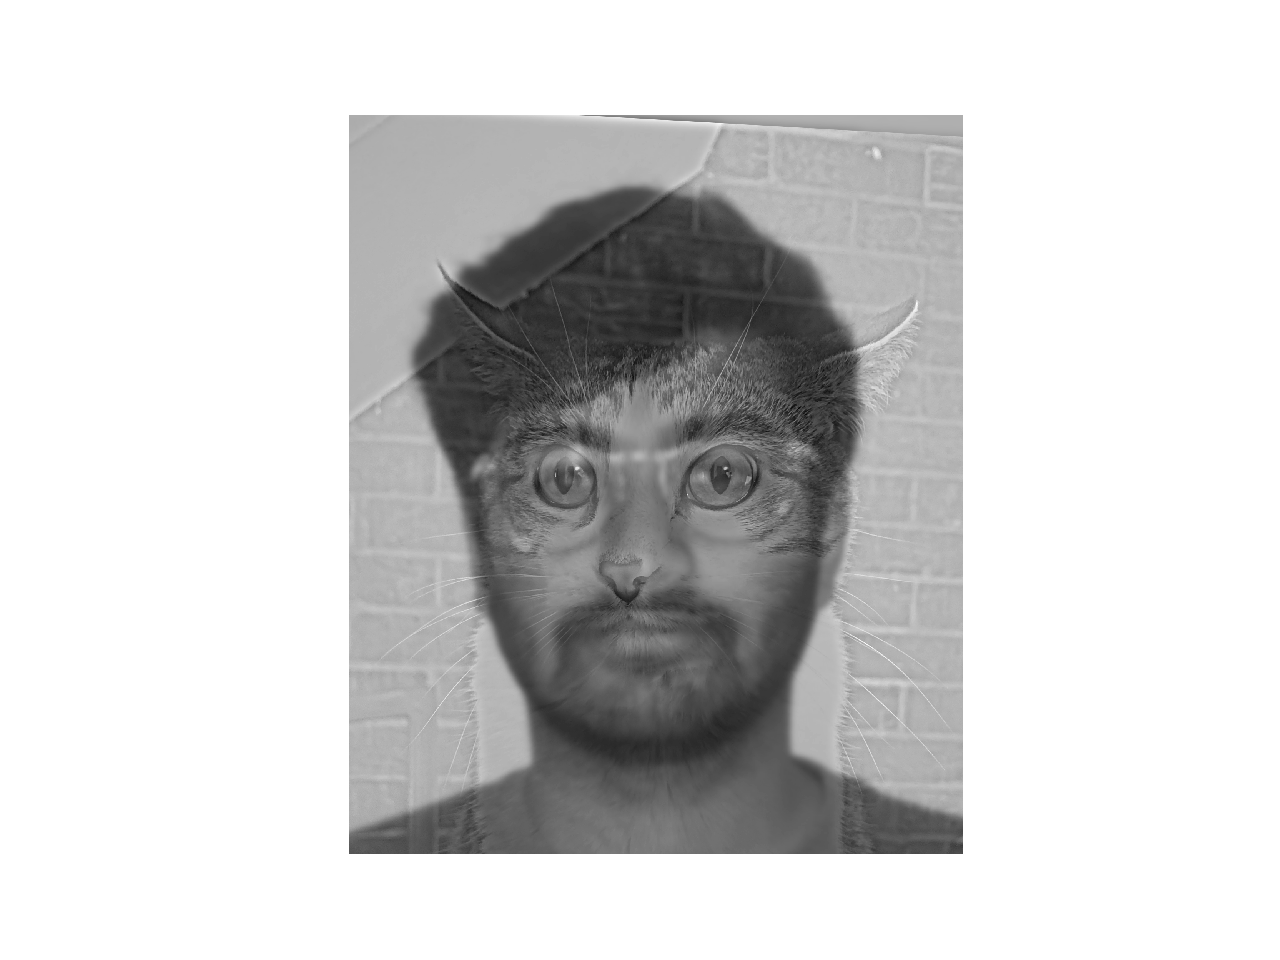

In [13]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


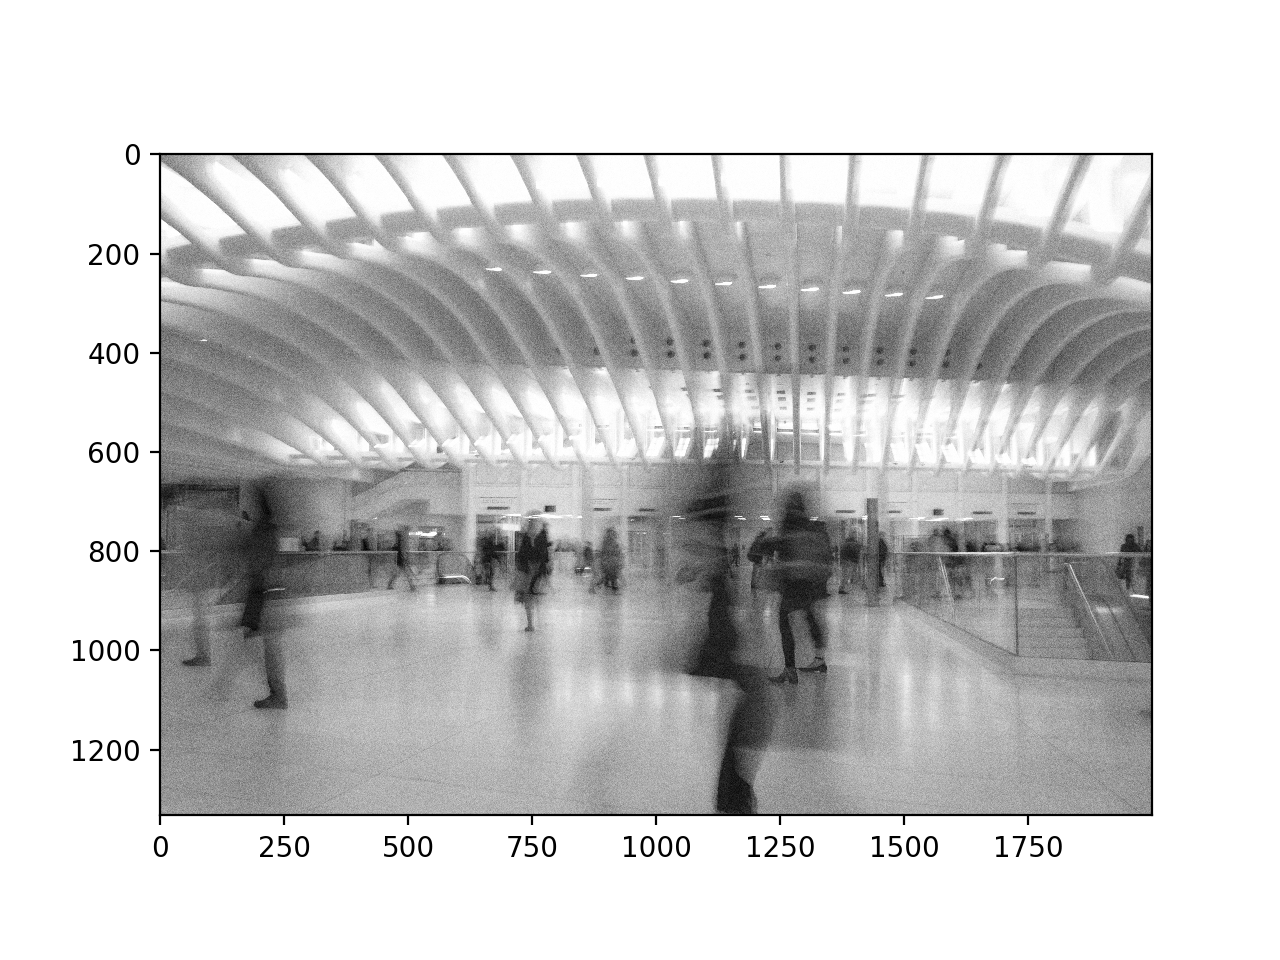

<IPython.core.display.Javascript object>


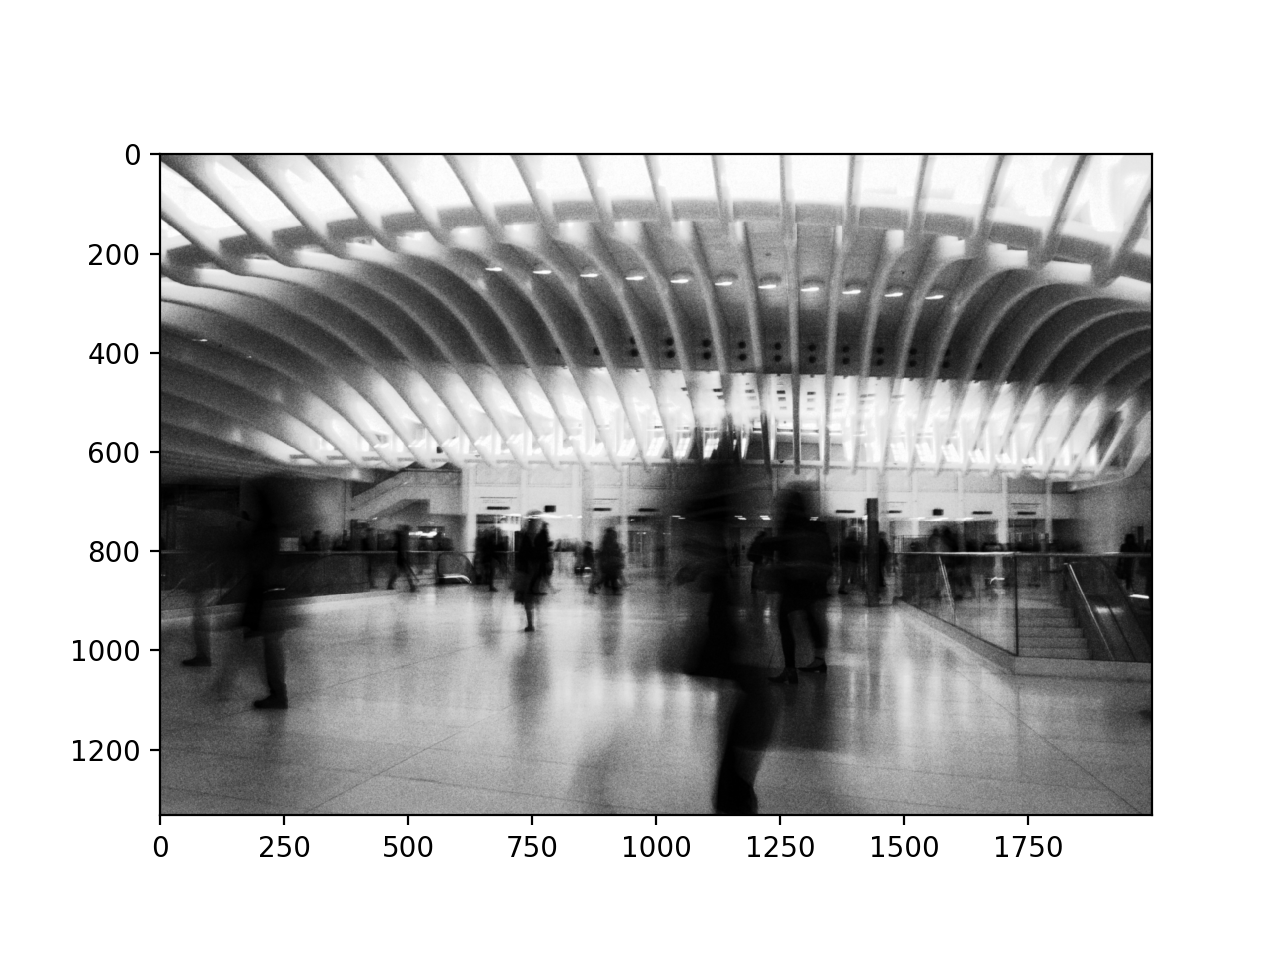

In [14]:
im1_file = './contrast3.jpg'
im1 = cv2.imread(im1_file,cv2.IMREAD_GRAYSCALE)

im1_eq = cv2.equalizeHist(im1)
im1_out = sc.ndimage.gaussian_filter(im1_eq, sigma=1)

plt.figure()
plt.imshow(im1,cmap='gray')

plt.figure()
plt.imshow(im1_out,cmap='gray')

I chose to use Histogram Equalization because this function expands the dynamic range of the image, causing all intensity levels to be equally weighted. This increases the contrast because the higher intensity parts of the original image are now exaggerated, and the lower intensity parts of the original image will be suppressed.

#### Color enhancement 

<IPython.core.display.Javascript object>


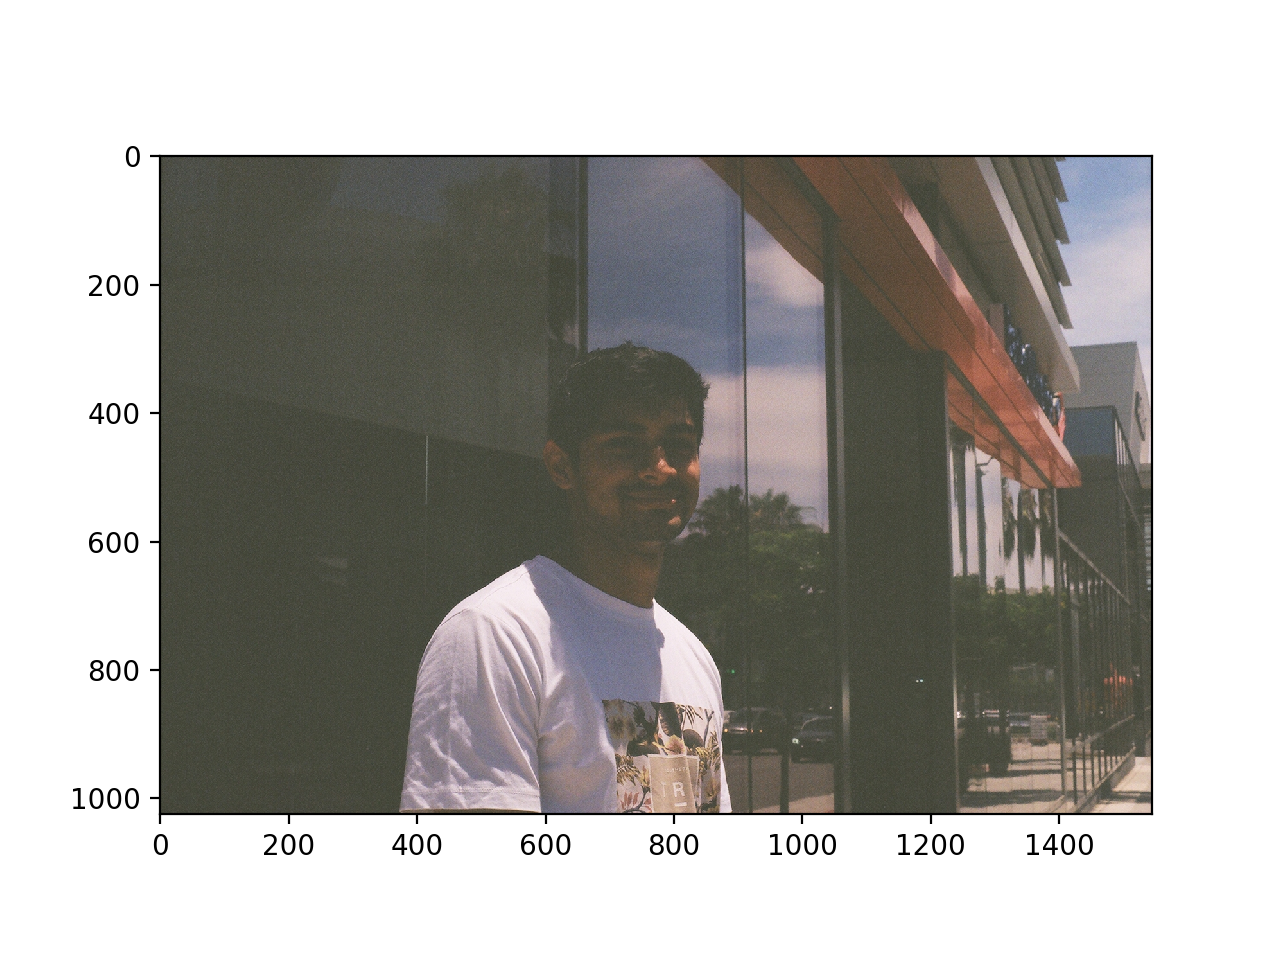

<IPython.core.display.Javascript object>


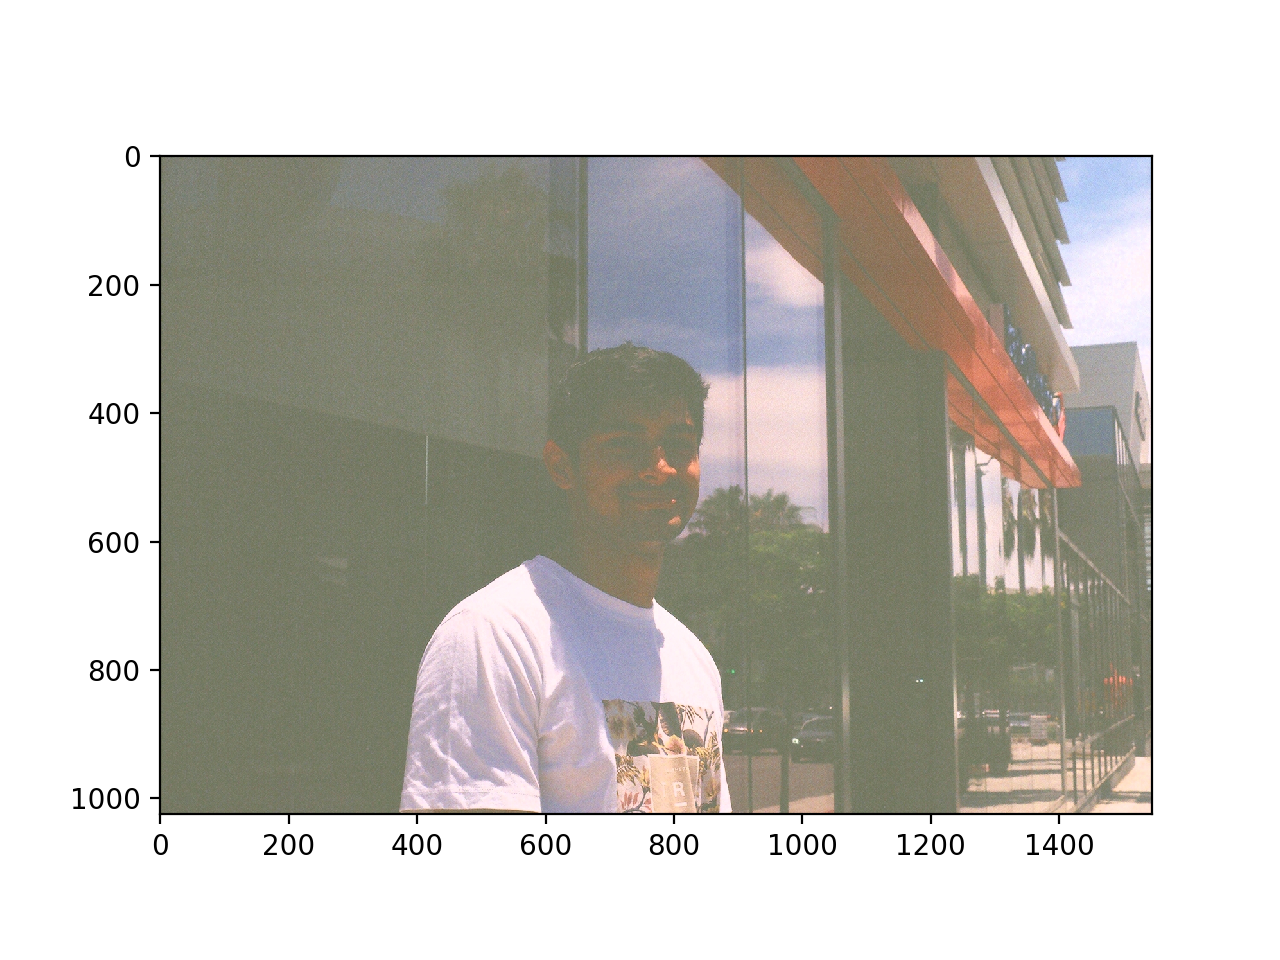

In [15]:
im1_file = './abi.jpg'
im1 = cv2.imread(im1_file)
im1_orig = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(im1,cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
value = 50
lim = 255 - value
v[v > lim] = 255
v[v <= lim] += value
final_hsv = cv2.merge((h, s, v))
im1_out = cv2.cvtColor(final_hsv,cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(im1_orig)
plt.figure()
plt.imshow(im1_out)